### Mean Shift (평균 이동)
- 데이터 포인트의 밀집된 영역을 찾으려고 시도하는 슬라이딩 윈도우 기반 알고리즘이다.
> 📌 슬라이딩 윈도우 알고리즘이란, 고정 사이즈의 윈도우가 이동하면서 윈도우 내에 있는 데이터를 이용해 문제를 풀이하는 알고리즘이다.
> - 일정 범위의 값을 비교할 때 사용하면 매우 유용하며, 최소한의 계산으로 다음 배열의 합을 구하는 방식이다.
> - 이전 배열의 첫 번째 원소를 빼고 다음에 들어올 원소를 더해주는 것이 최소한의 계산으로 다음 배열의 합을 구하는 방법이다.
- 각 군집(클러스터)의 중심점을 찾는 것이 목표이며, 중심점 후보를 슬라이딩 윈도우 내 점들의 평균으로 업데이트한다.
<img src="./images/mean_shift01.gif" width="200" style="margin-left:0">

- K-평균 클러스터링과 달리 자동으로 중심점을 발견하기 때문에 클러스터 수를 정해놓을 필요가 없다.
<div style="display: flex">
    <div>
        <img src="./images/mean_shift02.gif" width="300" style="margin-left:0">
    </div>
    <div>
        <img src="./images/mean_shift03.gif" width="400" style="margin-left:0">
    </div>
</div>

##### KDE (Kernel Density Estimation), 커널 밀도 추정
- 커널 함수를 통해 확률 밀도 함수(Probability Density Function)를 추정하는 방법으로서 대표적으로 가우시안 분포 함수(정규 분포 함수)가 사용된다.
- 데이터 포인트들(중심점)이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행한다.
> - K: 커널 함수
> - x: 확률 변수 데이터
> - x<sub>i</sub>: 관측 데이터
> - h: 대역폭(bandwidth)
<img src="./images/mean_shift04.png" width="400" style="margin-left:10px">
<img src="./images/mean_shift05.png" width="400" style="margin-left:10px; margin-bottom: 20px">
> - 대역폭이 클 수록 개별 커널 함수의 영향력이 작어져서 그래프가 곡선형에 가깝고 너무 크게 설정하면 과소적합의 위험이 있다.
> - 대역폭이 작을 수록 개별 커널 함수의 영향력이 커져서 그래프가 뾰족해지고 너무 작게 설정하면 과대적합의 위험이 있다.
<img src="./images/mean_shift06.png" width="400" style="margin-left:10px">

In [1]:
import pandas as pd

super_car_df = pd.read_csv('./datasets/super_car.csv')
super_car_df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [2]:
super_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [3]:
super_car_df = super_car_df.iloc[super_car_df[['Car Make', 'Car Model', 'Year']].drop_duplicates().index, :]
super_car_df = super_car_df.reset_index(drop=True)
super_car_df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
257,Mercedes-AMG,C63 S,2022,4,503,516,3.7,"78,100"
258,Pininfarina,Battista,2021,Electric,1872,1696,1.9,"2,500,000"
259,Maserati,MC20,2021,3,621,538,2.9,"210,000"
260,BMW,M2,2021,3,405,406,4,"58,900"


In [4]:
super_car_df.isna().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            4
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [5]:
super_car_df['0-60 MPH Time (seconds)'] = super_car_df['0-60 MPH Time (seconds)'].apply(lambda x: x.replace('< ', ''))
super_car_df['0-60 MPH Time (seconds)'] = super_car_df['0-60 MPH Time (seconds)'].astype('float16')

In [6]:
super_car_df['Price (in USD)'] = super_car_df['Price (in USD)'].apply(lambda x: x.replace(',', ''))
super_car_df['Price (in USD)'] = super_car_df['Price (in USD)'].astype('int32')

In [7]:
super_car_df['Torque (lb-ft)'] = super_car_df['Torque (lb-ft)'].astype('int32')

In [9]:
super_car_df['Horsepower'] = super_car_df['Horsepower'].apply(lambda x: x.replace('1000+', '1000'))
super_car_df['Horsepower'] = super_car_df['Horsepower'].apply(lambda x: x.replace(',', ''))
super_car_df['Horsepower'] = super_car_df['Horsepower'].astype('int16')

In [10]:
super_car_df['Name'] = super_car_df['Car Make'] + ' ' + super_car_df['Car Model']
super_car_df = super_car_df.drop(columns=['Car Make', 'Car Model', 'Year'], axis=1)
super_car_df

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Name
0,3,379,331,4.000000,101200,Porsche 911
1,5.2,630,443,2.800781,274390,Lamborghini Huracan
2,3.9,661,561,3.000000,333750,Ferrari 488 GTB
3,5.2,562,406,3.199219,142700,Audi R8
4,4,710,568,2.699219,298000,McLaren 720S
...,...,...,...,...,...,...
257,4,503,516,3.699219,78100,Mercedes-AMG C63 S
258,Electric,1872,1696,1.900391,2500000,Pininfarina Battista
259,3,621,538,2.900391,210000,Maserati MC20
260,3,405,406,4.000000,58900,BMW M2


In [11]:
super_car_df = super_car_df.iloc[super_car_df.Name.drop_duplicates().index, :].reset_index(drop=True)
super_car_df

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Name
0,3,379,331,4.000000,101200,Porsche 911
1,5.2,630,443,2.800781,274390,Lamborghini Huracan
2,3.9,661,561,3.000000,333750,Ferrari 488 GTB
3,5.2,562,406,3.199219,142700,Audi R8
4,4,710,568,2.699219,298000,McLaren 720S
...,...,...,...,...,...,...
173,4,473,457,3.900391,134150,Porsche Panamera GTS
174,4,630,664,3.099609,171200,Mercedes-Benz AMG GT 4-Door Coupe
175,4,503,516,3.699219,78100,Mercedes-AMG C63 S
176,3,621,538,2.900391,210000,Maserati MC20


In [12]:
super_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Engine Size (L)          175 non-null    object 
 1   Horsepower               178 non-null    int16  
 2   Torque (lb-ft)           178 non-null    int32  
 3   0-60 MPH Time (seconds)  178 non-null    float16
 4   Price (in USD)           178 non-null    int32  
 5   Name                     178 non-null    object 
dtypes: float16(1), int16(1), int32(2), object(2)
memory usage: 5.0+ KB


In [13]:
super_car_df.isna().sum()

Engine Size (L)            3
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
Name                       0
dtype: int64

In [14]:
super_car_df['Engine Size (L)'].value_counts()

Engine Size (L)
4                 43
3                 18
6.2               18
2                  9
3.8                8
5                  8
3.9                6
5.2                6
Electric           6
2.9                6
6                  5
2.5                5
6.5                5
3.7                4
3.5                4
8                  3
4.4                3
1.7                2
6.8                2
8.4                2
5.5                1
5.7                1
3.6                1
4.6                1
6.6                1
4.7                1
1.8                1
3.3                1
7                  1
1.5 + Electric     1
Electric Motor     1
2.3                1
Name: count, dtype: int64

In [15]:
super_car_df['Engine Size (L)'] = super_car_df['Engine Size (L)'].fillna('Electric')
super_car_df.isna().sum()

Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
Name                       0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
super_car_df['Engine Size (L)'] = encoder.fit_transform(super_car_df['Engine Size (L)'])
print(encoder.classes_)

['1.5 + Electric' '1.7' '1.8' '2' '2.3' '2.5' '2.9' '3' '3.3' '3.5' '3.6'
 '3.7' '3.8' '3.9' '4' '4.4' '4.6' '4.7' '5' '5.2' '5.5' '5.7' '6' '6.2'
 '6.5' '6.6' '6.8' '7' '8' '8.4' 'Electric' 'Electric Motor']


[ 0.28847906 -0.46295408 -1.33800442  2.31701567 -1.46737593 -0.74854769
 -1.01752136  1.6350668   0.92254561 -0.71988132 -0.96488339  0.25358279
  0.3080074  -0.071606   -1.13548051 -0.1022454   0.80818623  0.23199239
 -1.40035848  0.71590778 -2.12456763  1.24141343  0.23631196 -1.08889182
  0.71775919  0.04340449 -0.2952642  -0.19715794  0.80786027 -1.07675649]


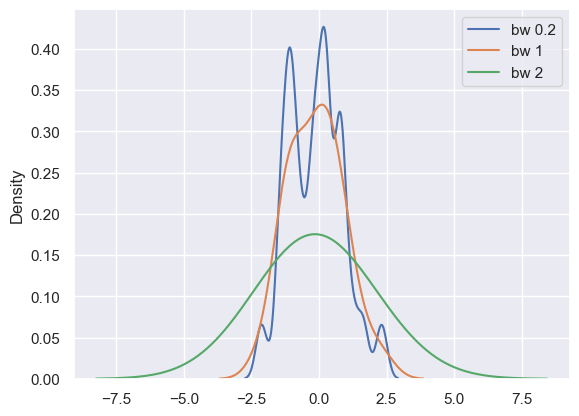

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

np.random.seed(124)
x = np.random.normal(0, 1, size=30)
print(x)
sns.kdeplot(x, bw_method=0.2, label='bw 0.2')
sns.kdeplot(x, label='bw 1')
sns.kdeplot(x, bw_method=2, label='bw 2')
plt.legend()

In [18]:
super_car_df

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Name
0,7,379,331,4.000000,101200,Porsche 911
1,19,630,443,2.800781,274390,Lamborghini Huracan
2,13,661,561,3.000000,333750,Ferrari 488 GTB
3,19,562,406,3.199219,142700,Audi R8
4,14,710,568,2.699219,298000,McLaren 720S
...,...,...,...,...,...,...
173,14,473,457,3.900391,134150,Porsche Panamera GTS
174,14,630,664,3.099609,171200,Mercedes-Benz AMG GT 4-Door Coupe
175,14,503,516,3.699219,78100,Mercedes-AMG C63 S
176,7,621,538,2.900391,210000,Maserati MC20


In [19]:
from sklearn.preprocessing import StandardScaler

scaled_super_car_df = StandardScaler().fit_transform(super_car_df.iloc[:, :-1])
scaled_super_car_df = pd.DataFrame(scaled_super_car_df, columns=super_car_df.iloc[:, :-1].columns)
scaled_super_car_df

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,-1.039014,-0.788585,-0.909284,0.585273,-0.374773
1,0.526102,0.040979,-0.455609,-0.897163,-0.173219
2,-0.256456,0.143435,0.022370,-0.650895,-0.104138
3,0.526102,-0.183764,-0.605484,-0.404627,-0.326476
4,-0.126030,0.305381,0.050724,-1.022711,-0.145742
...,...,...,...,...,...
173,-0.126030,-0.477912,-0.398900,0.462139,-0.336427
174,-0.126030,0.040979,0.439588,-0.527761,-0.293309
175,-0.126030,-0.378761,-0.159910,0.213457,-0.401656
176,-1.039014,0.011233,-0.070796,-0.774029,-0.248154


In [23]:
from sklearn.cluster import MeanShift

meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(scaled_super_car_df)
# np의 unique는 중복없이 선택할 때 사용한다.
print('cluster labels:', np.unique(cluster_labels))

cluster labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


##### estimate_bandwidth(input, quantile=0.3)
- 내부적으로 최적의 kernel bandwidth를 정하기 위해 KNN 기법을 이용한다.
- KNN을 수행하는 데이터의 건수를 (전체 데이터 * quantile) 로 정하게 되며, 같은 클러스터 내의 데이터간 평균 거리를 기반으로 bandwidth를 정한다.
- quantile이 크면 bandwidth 값이 커져서 클러스터 개수가 작아지고, quantile이 작으면 bandwidth 값이 작아져서 클러스터 개수가 많아진다.
- quantile의 범위는 0 ~ 1사이이다.

In [24]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(scaled_super_car_df, quantile=0.5)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 2.246


In [25]:
from sklearn.cluster import MeanShift

meanshift= MeanShift(bandwidth=2.246)
cluster_labels = meanshift.fit_predict(scaled_super_car_df)
print('cluster labels:', np.unique(cluster_labels))

cluster labels: [0 1 2]


In [26]:
super_car_df['cluster'] = cluster_labels
super_car_df

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Name,cluster
0,7,379,331,4.000000,101200,Porsche 911,0
1,19,630,443,2.800781,274390,Lamborghini Huracan,0
2,13,661,561,3.000000,333750,Ferrari 488 GTB,0
3,19,562,406,3.199219,142700,Audi R8,0
4,14,710,568,2.699219,298000,McLaren 720S,0
...,...,...,...,...,...,...,...
173,14,473,457,3.900391,134150,Porsche Panamera GTS,0
174,14,630,664,3.099609,171200,Mercedes-Benz AMG GT 4-Door Coupe,0
175,14,503,516,3.699219,78100,Mercedes-AMG C63 S,0
176,7,621,538,2.900391,210000,Maserati MC20,0


In [27]:
super_car_df.cluster.value_counts()

cluster
0    155
1     14
2      9
Name: count, dtype: int64

In [28]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
import numpy as np
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

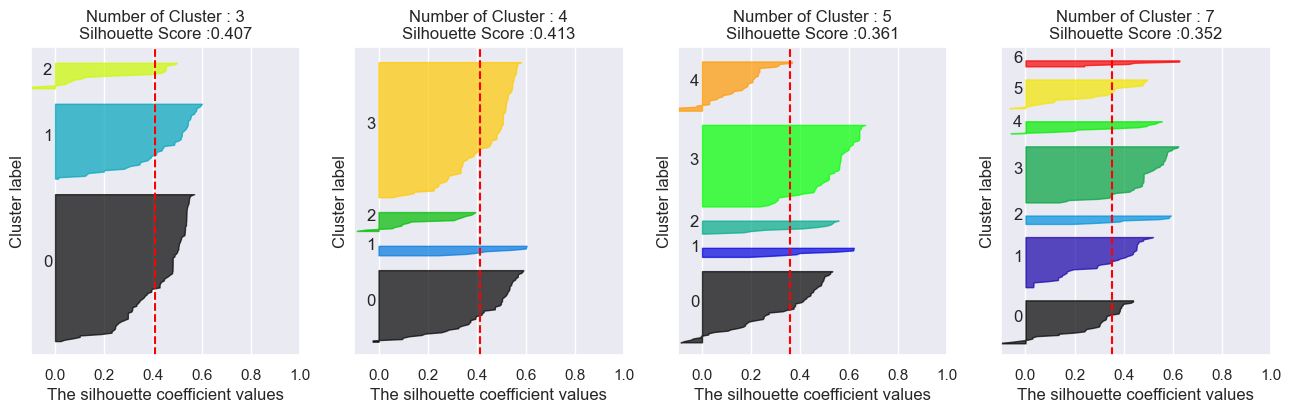

In [30]:
from sklearn.datasets import load_iris

visualize_silhouette([3, 4, 5, 7], scaled_super_car_df)

<Axes: xlabel='Torque (lb-ft)', ylabel='Price (in USD)'>

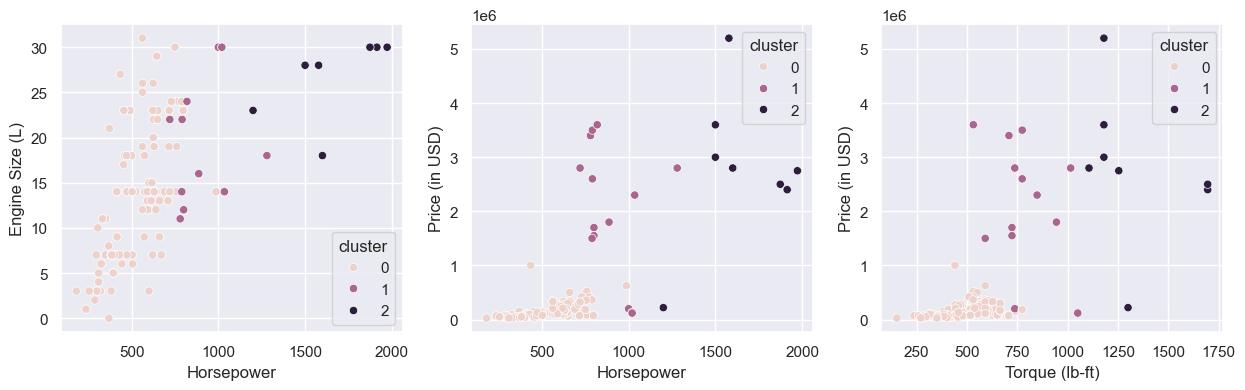

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.scatterplot(x='Horsepower', y='Engine Size (L)', hue='cluster', data=super_car_df, ax=ax[0])
sns.scatterplot(x='Horsepower', y='Price (in USD)', hue='cluster', data=super_car_df, ax=ax[1])
sns.scatterplot(x='Torque (lb-ft)', y='Price (in USD)', hue='cluster', data=super_car_df, ax=ax[2])